Prediction formula for a linear model can be written as 
$\hat{y}=w[0]\times x[0] + b$, Here $w[0]$ is the slope and $b$ is the y-axis offset. You can think of the predicted response as being a weighted sum of the input features,with weights given by the entries of $w$.

##### Linear Regression(Ordinary Least Squares)
Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values.

In [2]:
from sklearn.linear_model import LinearRegression
import mglearn
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
lr=LinearRegression().fit(X_train,y_train)

print("Slope parameters:{}".format(lr.coef_))#numpy array
print("Intercep(b):{}".format(lr.intercept_))#float number

Slope parameters:[0.39390555]
Intercep(b):-0.031804343026759746


In [3]:
print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.67
Test set score: 0.66


The scores of training and test sets are very close. This means we are likely underfitting. Now we can try same model on different dataset.

In [4]:
X1,y1=mglearn.datasets.load_extended_boston()

X_train, X_test ,y_train, y_test = train_test_split(X1,y1,random_state=0)
lr=LinearRegression().fit(X_train,y_train)

In [5]:
print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.95
Test set score: 0.61


This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity

##### Ridge Regression
In ridge regression, coefficients (w) are chosen to predict well on training data and to be as small as possible, meaning all entries of w should be close to zero. This implies each feature should minimally impact the outcome while still predicting well. This constraint is an example of regularization, which restricts a model to avoid overfitting.


In [6]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.89
Test set score: 0.75


As we can see from the scores Ridge model has better performance. The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. We can set alpha parameter to control performanca of model. Alpha set to 1 as default, incresing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization. 

In [7]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test,y_test)))

Training set score: 0.79
Test set score: 0.64


In [8]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test,y_test)))

Training set score: 0.93
Test set score: 0.77


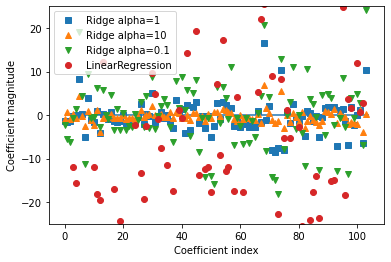

In [9]:
import matplotlib.pyplot as plt


plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

The x-axis shows the entries of **coef_** (features), and the y-axis shows the numeric values of the coefficients. For **alpha=10**, most coefficients are between -3 and 3. With **alpha=1**, the coefficients are larger. The dots for **alpha=0.1** have even larger magnitudes, and for **alpha=0** (no regularization), many coefficients are so large they're outside the chart.

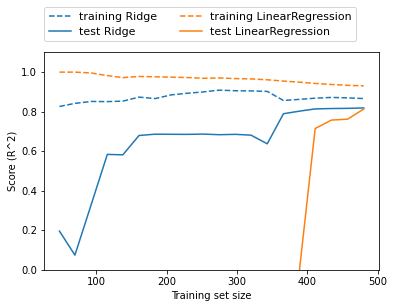

In [11]:
mglearn.plots.plot_ridge_n_samples()
#Bostondataset
#LinearRegression vs Ridge(alpha=1)

Another way to understand the influence of regularization is to fix a value of alpha but vary the amount of training data available. Certainly! Here's a shorter version:

The training score is higher than the test score for all dataset sizes in both ridge and linear regression. Ridge, being regularized, has a lower training score but a better test score, especially with smaller datasets. With fewer than 400 data points, linear regression doesn't learn effectively. As more data becomes available, both models improve, and linear regression eventually catches up with ridge.

The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance. 



##### Lasso
Lasso restrict coefficients to be close to zero, but with a different way called L1 regularization. L1 regularization set some coefficients zero. This means some features are ignored. This makes model to interpret easier.

In [13]:
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [16]:
print(X_train.shape)

(379, 104)


The result of the Lasso is bad we can see that it used 4 features out of 104. Here we can adjust the maximum iteration number to reduce underfitting.

In [17]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [18]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

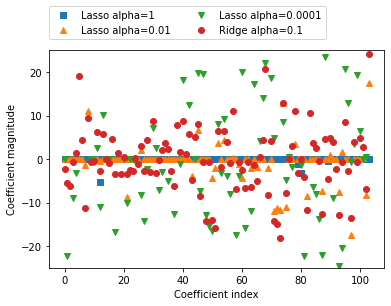

In [19]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

For **alpha=1**, most coefficients are zero, and the remaining ones are small. With **alpha=0.01**, most features are exactly zero. When **alpha=0.00001**, the model is nearly unregularized, with most coefficients nonzero and large. The Ridge model with **alpha=0.1** has a similar predictive performance to the lasso model with **alpha=0.01**, but with all coefficients nonzero.